# Project 2 | Classification of Skin Lesions
### Classifying skin lesions using scipy, sklearn and cv2

This notebook contains a step by step process to recreate the results of the report.

A detailed explanation regarding feature extraction and choices of classification model can be found in the report.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import path
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import cv2
from sklearn.preprocessing import StandardScaler
import groupXY_functions as util
import os

import warnings
warnings.filterwarnings("ignore")

# Feature extraction

- load segmenation mask and lesion image
- extract features
- write to csv file

In [21]:
## DISCLAMER: All the code for feature extraction is in groupXY_functions.py, and imported as util.
## if you need more explenation of the code, this is a good place to look for quality comments 
# The classify script is in two scripts: classify.py for classic approach and classify_cnn.py for neural networks

In [22]:
feature_extract = True

In [23]:
#reading groundtruth for the full 2000 pictures 
if feature_extract: dfout = pd.read_csv(path.ground_truth_full)

In [24]:
dfout = pd.read_csv(path.out+'out_rescaled_v2.csv', index_col=0)
dfout

,image_id,melanoma,seborrheic_keratosis,color_lesion_r,color_lesion_g,color_lesion_b,color_skin_r,color_skin_g,color_skin_b,area,perimeter,min_symmetry,avg_symmetry,color_variance,sym_new
0,ISIC_0000000,0.0,0.0,39.054190,36.538438,40.255583,131.778399,112.052640,91.833945,93199950.0,92836720.0,16029.0,7.049952e+04,151.360497,20188.0
1,ISIC_0000001,0.0,0.0,2.845744,3.609158,5.347413,162.981837,158.673963,161.133578,13683300.0,13630556.0,2767.0,4.245661e+03,80.006250,1327.0
2,ISIC_0000002,1.0,0.0,33.629795,32.640172,39.234969,154.099134,118.378237,97.091812,60678015.0,60442135.0,12255.0,2.758868e+04,111.763142,6269.0
3,ISIC_0000003,0.0,0.0,23.266308,31.746686,44.736262,145.226959,144.897696,145.935318,66636855.0,66377384.0,15177.0,2.240491e+04,133.195345,10788.0
4,ISIC_0000004,1.0,0.0,52.905618,43.803538,64.394117,27.534957,25.022511,26.508849,68880345.0,68611974.0,5921.0,3.635539e+04,137.091211,10508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ISIC_0015220,0.0,1.0,35.906329,43.317209,102.319993,31.248853,32.884912,56.015390,146078280.0,145508436.0,146078280.0,1.460783e+08,77.162167,22655.0
1996,ISIC_0015233,0.0,1.0,15.658445,20.133662,29.912802,90.463575,110.652808,163.966020,49971585.0,49777107.0,13782.0,2.372966e+04,143.687160,11932.0
1997,ISIC_0015260,0.0,1.0,6.732133,10.198769,16.232717,133.427841,148.020522,169.899677,40330800.0,40174553.0,11523.0,3.770876e+04,130.847239,3756.0
1998,ISIC_0015284,1.0,0.0,25.291181,32.293236,52.834563,78.411413,80.390572,106.683993,77099760.0,76799380.0,18769.0,3.436549e+04,166.078295,18331.0


In [25]:
if feature_extract:
	for index, line in dfout.iterrows():
		# for each image in ground truth, load img, mask
		id_ = line['image_id'] 
		
		img = cv2.imread(path.images_full+f'{id_}.jpg')
		mask = cv2.imread(path.segmentation_full+f'{id_}_segmentation.png',0)

		img, mask = util.scale_image_res(img,mask)
		
		# img_plt, mask_plt = plt.imread(path.images_full+f'{id_}.jpg'), plt.imread(path.segmentation_full+f'{id_}_segmentation.png')
		# img_plt, mask_plt = util.scale_image_res(img_plt,mask_plt)	

		# # remove skin from lesion pictures.
		# res = cv2.bitwise_and(img,img,mask = mask)
		# notmask = cv2.bitwise_not(mask)
		# notres = cv2.bitwise_and(img,img,mask = notmask)
		

		print(f'Running extraction on image {index} out of {dfout.shape[0]} ({index / dfout.shape[0] :0.2%})', end='\r', flush=True)

		# add feature to dfout
		# dfout.at[index, ['color_lesion_r','color_lesion_g','color_lesion_b']] = util.averageColorsSimple(res)

		# dfout.at[index, ['color_skin_r','color_skin_g','color_skin_b']] = util.averageColorsSimple(notres)

		# dfout.at[index, ['area','perimeter']] = util.measure_area_perimeter(mask)

		# dfout.at[index, ['min_symmetry', 'avg_symmetry']] = util.all_deg(mask)

		#dfout.at[index, ['sym_new']] = util.symetry_Score(mask)

		# dfout.at[index, ['border_dark', 'border_skin']] = util.boundry_check2(img_plt,mask_plt)

		dfout.at[index, ['color_variance_new']] = util.color_variance(img, mask)

In [26]:
dfout

,image_id,melanoma,seborrheic_keratosis,color_lesion_r,color_lesion_g,color_lesion_b,color_skin_r,color_skin_g,color_skin_b,area,perimeter,min_symmetry,avg_symmetry,color_variance,sym_new,color_variance_new
0,ISIC_0000000,0.0,0.0,39.054190,36.538438,40.255583,131.778399,112.052640,91.833945,93199950.0,92836720.0,16029.0,7.049952e+04,151.360497,20188.0,150.416090
1,ISIC_0000001,0.0,0.0,2.845744,3.609158,5.347413,162.981837,158.673963,161.133578,13683300.0,13630556.0,2767.0,4.245661e+03,80.006250,1327.0,76.798437
2,ISIC_0000002,1.0,0.0,33.629795,32.640172,39.234969,154.099134,118.378237,97.091812,60678015.0,60442135.0,12255.0,2.758868e+04,111.763142,6269.0,120.091632
3,ISIC_0000003,0.0,0.0,23.266308,31.746686,44.736262,145.226959,144.897696,145.935318,66636855.0,66377384.0,15177.0,2.240491e+04,133.195345,10788.0,133.277905
4,ISIC_0000004,1.0,0.0,52.905618,43.803538,64.394117,27.534957,25.022511,26.508849,68880345.0,68611974.0,5921.0,3.635539e+04,137.091211,10508.0,199.451749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ISIC_0015220,0.0,1.0,35.906329,43.317209,102.319993,31.248853,32.884912,56.015390,146078280.0,145508436.0,146078280.0,1.460783e+08,77.162167,22655.0,113.393121
1996,ISIC_0015233,0.0,1.0,15.658445,20.133662,29.912802,90.463575,110.652808,163.966020,49971585.0,49777107.0,13782.0,2.372966e+04,143.687160,11932.0,136.367151
1997,ISIC_0015260,0.0,1.0,6.732133,10.198769,16.232717,133.427841,148.020522,169.899677,40330800.0,40174553.0,11523.0,3.770876e+04,130.847239,3756.0,117.736995
1998,ISIC_0015284,1.0,0.0,25.291181,32.293236,52.834563,78.411413,80.390572,106.683993,77099760.0,76799380.0,18769.0,3.436549e+04,166.078295,18331.0,149.083869


<AxesSubplot:ylabel='Density'>

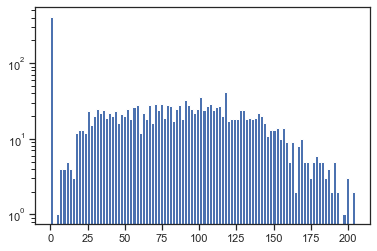

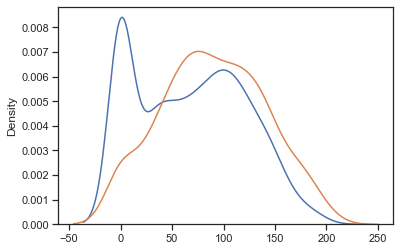

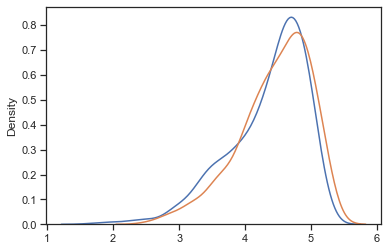

In [28]:
plt.hist(dfout["color_variance_new"], bins=100, log=True)

target_0 = dfout.loc[dfout['melanoma'] == 0]
target_1 = dfout.loc[dfout['melanoma'] == 1]

variable = "color_variance_new"
plt.figure()
sns.distplot(target_0[[variable]], hist = False)
sns.distplot(target_1[[variable]], hist = False)

plt.figure()
sns.distplot(np.log(target_0[[variable]]), hist = False)
sns.distplot(np.log(target_1[[variable]]), hist = False)

# dfout['std_sym_new'] = dfout['sym_new'] / (dfout['area'] / 255)

# variable = "std_sym_new"
# plt.figure()
# sns.distplot(target_0[[variable]], hist = False)
# sns.distplot(target_1[[variable]], hist = False)

# plt.figure()
# sns.distplot(np.log(target_0[[variable]]), hist = False)
# sns.distplot(np.log(target_1[[variable]]), hist = False)

In [29]:
if feature_extract:
    save_path = path.out+'out_rescaled_v3.csv'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    dfout.to_csv(save_path)

In [30]:
df = pd.read_csv(path.out+'out_rescaled_v3.csv', index_col=0)
df.drop(['seborrheic_keratosis'], axis=1, inplace=True)
df.set_index('image_id', inplace = True)
df

,melanoma,color_lesion_r,color_lesion_g,color_lesion_b,color_skin_r,color_skin_g,color_skin_b,area,perimeter,min_symmetry,avg_symmetry,color_variance,sym_new,color_variance_new,std_sym_new
image_id,,,,,,,,,,,,,,,
ISIC_0000000,0.0,39.054190,36.538438,40.255583,131.778399,112.052640,91.833945,93199950.0,92836720.0,16029.0,7.049952e+04,151.360497,20188.0,150.416090,0.055235
ISIC_0000001,0.0,2.845744,3.609158,5.347413,162.981837,158.673963,161.133578,13683300.0,13630556.0,2767.0,4.245661e+03,80.006250,1327.0,76.798437,0.024730
ISIC_0000002,1.0,33.629795,32.640172,39.234969,154.099134,118.378237,97.091812,60678015.0,60442135.0,12255.0,2.758868e+04,111.763142,6269.0,120.091632,0.026346
ISIC_0000003,0.0,23.266308,31.746686,44.736262,145.226959,144.897696,145.935318,66636855.0,66377384.0,15177.0,2.240491e+04,133.195345,10788.0,133.277905,0.041283
ISIC_0000004,1.0,52.905618,43.803538,64.394117,27.534957,25.022511,26.508849,68880345.0,68611974.0,5921.0,3.635539e+04,137.091211,10508.0,199.451749,0.038901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISIC_0015220,0.0,35.906329,43.317209,102.319993,31.248853,32.884912,56.015390,146078280.0,145508436.0,146078280.0,1.460783e+08,77.162167,22655.0,113.393121,0.039547
ISIC_0015233,0.0,15.658445,20.133662,29.912802,90.463575,110.652808,163.966020,49971585.0,49777107.0,13782.0,2.372966e+04,143.687160,11932.0,136.367151,0.060888
ISIC_0015260,0.0,6.732133,10.198769,16.232717,133.427841,148.020522,169.899677,40330800.0,40174553.0,11523.0,3.770876e+04,130.847239,3756.0,117.736995,0.023748


## Note
Min and avg symmetry is based on amount of pixels that dont overlap at different rotations. To account for different sizes of masks we devide by the area to standardize the scores and give a procent of the masks that dont overlap when folded.

In [31]:
# Standardize symmetry 
df['std_min_symmetry'] = df['min_symmetry'] / (df['area'] / 255)
df['std_avg_symmetry'] = df['avg_symmetry'] / (df['area'] / 255)
df['std_sym_new'] = df['sym_new'] / (df['area'] / 255)

# Due to how we deal with masks hiiting border their area was taken based on sum of pixels with value 255.
# So here we correct by setting all values of 255 to 1 as it would be since area / area = 1
df.loc[ df['std_min_symmetry'] > 254, 'std_min_symmetry'] = 1
df.loc[ df['std_avg_symmetry'] > 254, 'std_avg_symmetry'] = 1


To capture some of the irregularities in the border we added the formula for circularity

In [32]:
df['circularity'] = (4*np.pi*df['area'])/(df['perimeter'])**2

In [33]:
df.drop(['min_symmetry', 'avg_symmetry', 'area', 'perimeter', 'color_lesion_b', 'color_lesion_g', 'color_skin_g', 'color_skin_b'], axis=1, inplace=True)

Scaled with standard scalar

In [34]:
#scaling features with standardscalar
featureDf = df.drop(['melanoma'], axis=1)
#logfeature = np.log(featureDf)

scalar = StandardScaler().fit(featureDf)

In [35]:
scaled_features = scalar.transform(featureDf)

In [36]:
#combining scaled df with our Y values
scaled_features_df = pd.DataFrame(scaled_features, index=featureDf.index, columns=featureDf.columns)
finalDf = pd.concat([scaled_features_df, df['melanoma']], axis = 1)

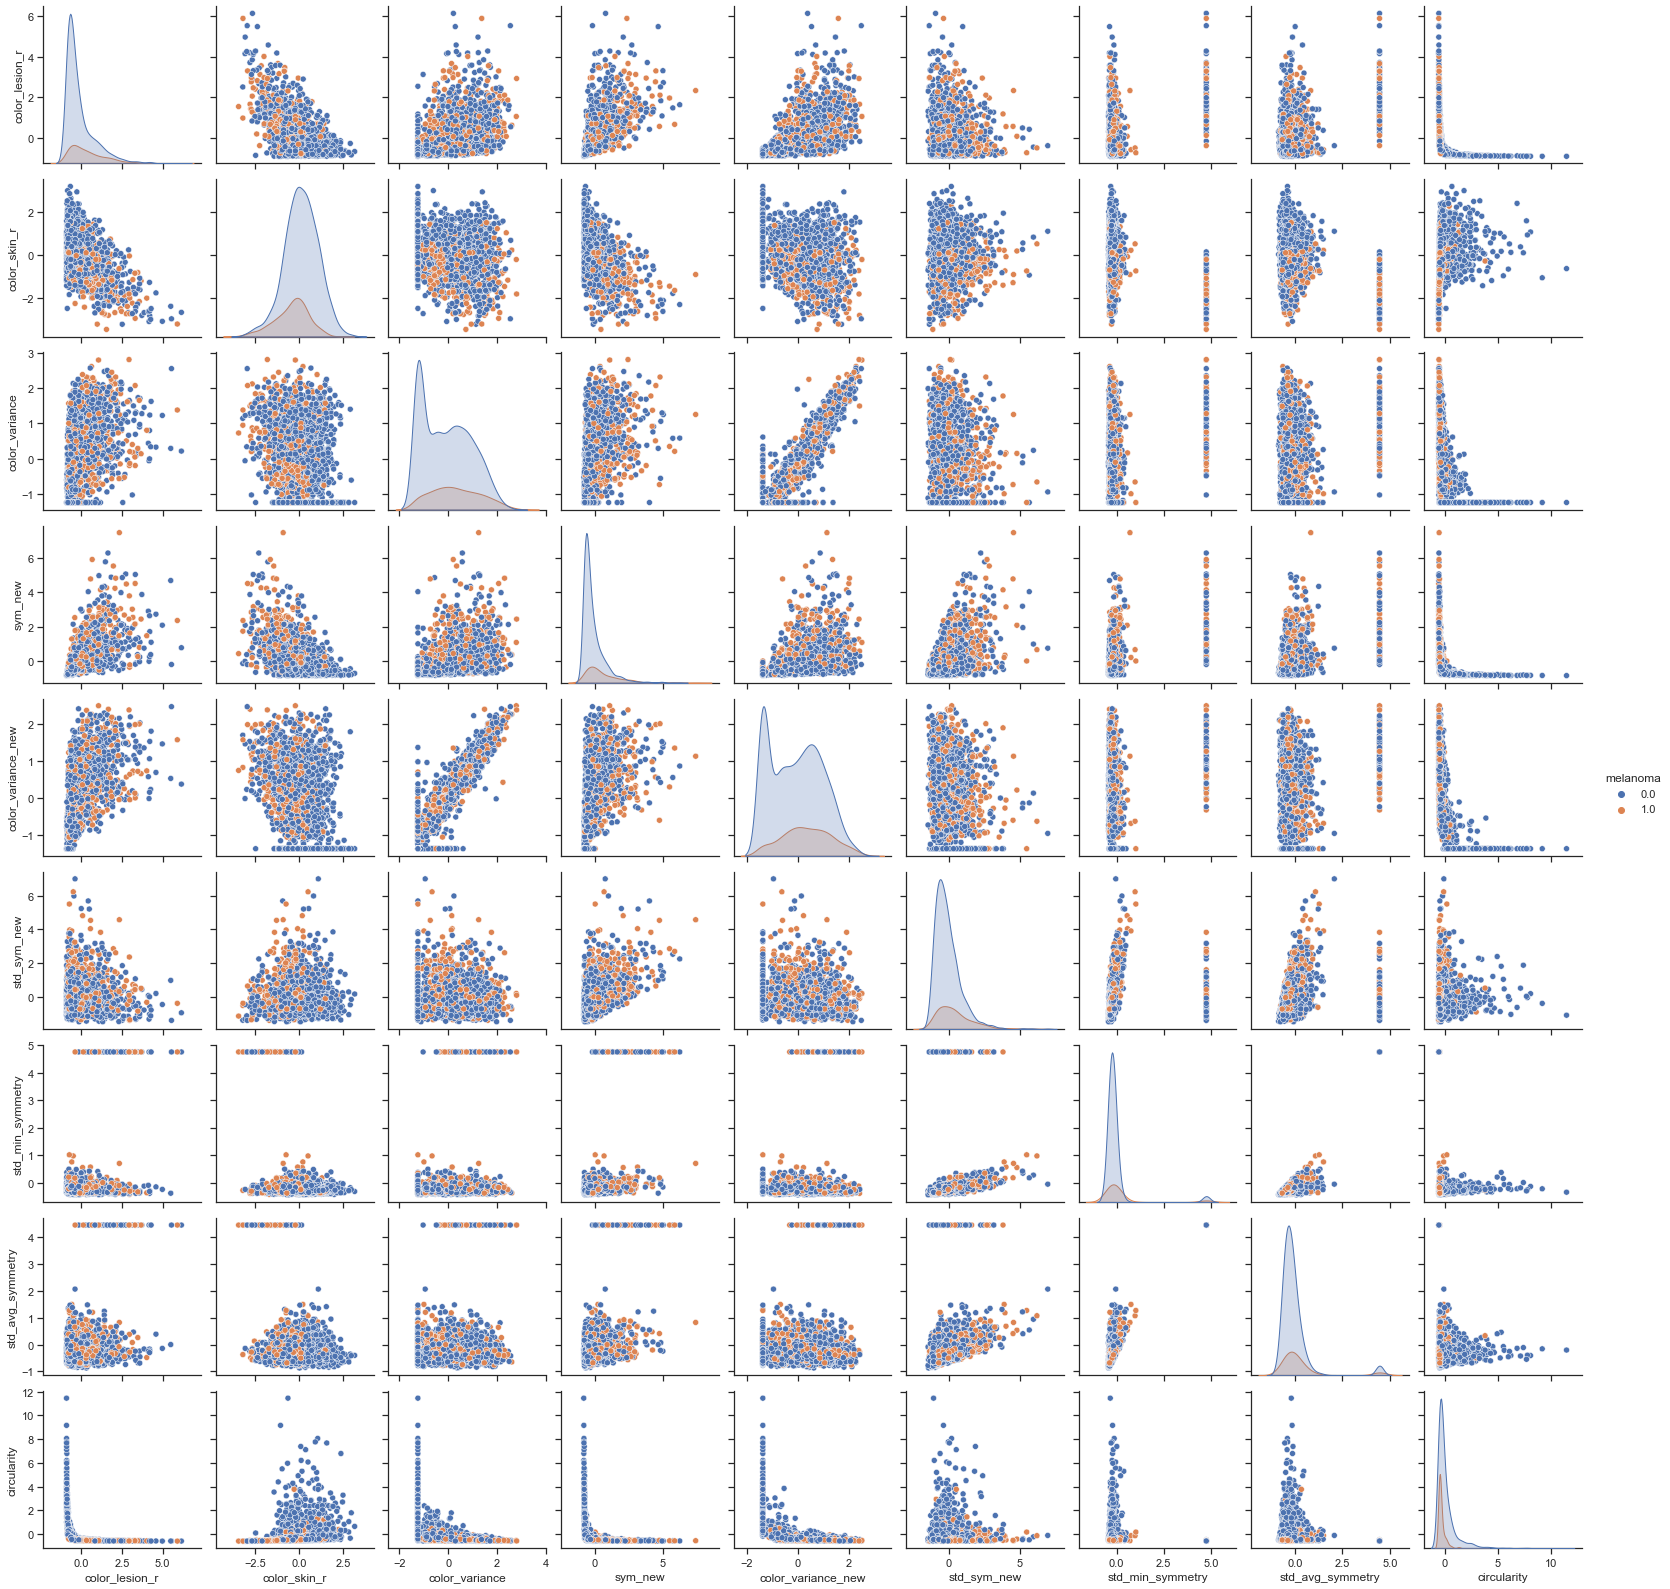

In [43]:
colors = {0:'tab:blue', 1:'tab:red'}
sns.pairplot(finalDf, hue='melanoma')

In [46]:
from itertools import combinations
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
df2=finalDf

X = df2.drop(['melanoma'], axis=1,)

Y = df2['melanoma']

## CODE TO CHECK ALL FEATURE COMBINATIONS BASED ON MEAN AUC ON 500 ITERATIONS ##

# features = list(X.columns)

# k = 3
# best_auc = 0

# for i in range(2, 7):
#     print(i)
#     for comb in tqdm(combinations(features, i)):
#         inner_auc = []
#         inner_acc = []
#         for j in range(500):
#             X_dev, X_test, y_dev, y_test = train_test_split(
#                     X[list(comb)], y, stratify=y)

#             X_train, X_val, y_train, y_val = train_test_split(
#                     X_dev, y_dev, stratify=y_dev)

#             knn = KNeighborsClassifier(n_neighbors=k) # other hyperparameters possible
#             knntrained = knn.fit(X_train, y_train)

#             y_val_knn = knntrained.predict(X_val)

#             acc_knn = accuracy_score(y_val, y_val_knn)
#             auc_knn = roc_auc_score(y_val, y_val_knn)

#             inner_auc.append(auc_knn)
#             inner_acc.append(acc_knn)
        
#         inner_auc = [1 - thing if thing < 0.5 else thing for thing in inner_auc]
#         mean_auc = np.mean(inner_auc)
#         mean_acc = np.mean(inner_acc)

#         if mean_auc > best_auc:
#             best_auc = mean_auc
#             best_acc = mean_acc
#             best_comb = comb

In [47]:
# Split dataset to development and test set
X_dev, X_test, y_dev, y_test = train_test_split(
        X[['color_variance', 'std_avg_symmetry']], Y, stratify=Y, test_size=0.2, random_state=180)

# Split development set to training and valuation sets

X_train, X_val, y_train, y_val = train_test_split(
       X_dev, y_dev, stratify=y_dev, random_state=180)

In [ ]:
# auc_list = [1 - thing if thing < 0.5 else thing for thing in auc_list]
# np.mean(auc_list)

In [49]:
# Train a classifiers
knn = KNeighborsClassifier(n_neighbors=5)
knntrained = knn.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "entropy")
dtree = dtree.fit(X_train, y_train)

y_val_tree = dtree.predict(X_val)
y_val_knn = knntrained.predict(X_val)

from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knntrained, X_val, y_val, cv=6)
scores_tree = cross_val_score(dtree, X_val, y_val, cv=6)

auc_knn = roc_auc_score(y_val, y_val_knn)
auc_tree = roc_auc_score(y_val, y_val_tree)


f1_knn = f1_score(y_val, y_val_knn)
f1_tree = f1_score(y_val, y_val_tree)

print(f'KNN: \nAccuracy: {np.mean(scores_knn)}  AUC_ROC: {auc_knn}  F1: {f1_knn}\n')
print(f'Tree: \nAccuracy: {np.mean(scores_tree)}  AUC_ROC: {auc_tree} F1: {f1_tree}')



KNN: 
Accuracy: 0.759950248756219  AUC_ROC: 0.5128205128205128  F1: 0.1346153846153846

Tree: 
Accuracy: 0.7277250113071009  AUC_ROC: 0.5266666666666667 F1: 0.23899371069182387


[[310  15]
 [ 67   8]]


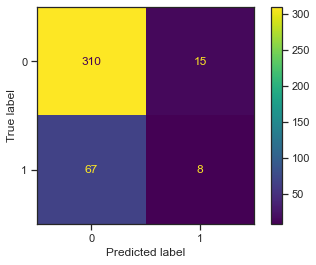

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Replication of KNN model
cm = confusion_matrix(y_val, y_val_knn, labels=[0, 1])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#The Chart of CNN model is available in cnn_evaluation file

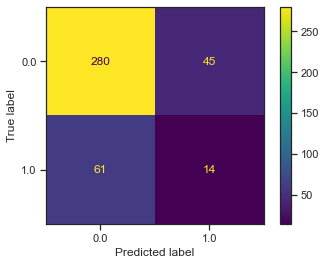

In [41]:
#Replication of KNN model
ConfusionMatrixDisplay.from_predictions(y_val, y_val_tree)

#The Chart of CNN model is available in cnn_evaluation file

In [42]:
# ONLY FOR REPORTING, also evaluate on test set
X_test = X_test

y_test_knn = knntrained.predict(X_test)
y_test_tree = dtree.predict(X_test)

auc_test = roc_auc_score(y_test, y_test_knn)
auc_test_tree = roc_auc_score(y_test, y_test_tree)

print(auc_test)
print(auc_test_tree)

# For sma
#ll datasets these results will depend on the random seed you chose when splitting, 
# this is why it is good to look at multiple splits/cross-validation

0.5328205128205128
0.5215384615384615


In [ ]:
import pickle
with open('pickle_knn.pickle','wb') as pickle_out:
    pickle.dump(knntrained,pickle_out)

with open('pickle_scalar.pickle','wb') as scalar_out:
    pickle.dump(scalar,scalar_out)

In [ ]:
#This function is in its entirety written and described in GroupXY_functions as Color_variance
#This part only reproduced the graphics used in the report

path = "ISIC_0007235"

image = plt.imread(f'data/example_image/{path}.jpg')
mask = plt.imread(f'data/example_segmentation/{path}_segmentation.png')
plt.imshow(mask, cmap='gray')
image, mask = util.scale_image_res(image, mask)
(h, w) = image.shape[:2]

_, mask2 = util.extract_mask_roi(image, mask, 20, 20)
image[mask2==0] = 0 #if the mask is black at some spot, set image color to black at that spot

plt.imshow(image)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

# apply k-means using the specified number of clusters (16) and
# then create the quantized image based on the predictions

clt = MiniBatchKMeans(n_clusters = 16, random_state=3)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

# reshape the feature vectors to images
quant = quant.reshape((h, w, 3))

# convert from L*a*b* to BGR and then to RGB gor matplotlib plotting
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
quant = cv2.cvtColor(quant, cv2.COLOR_BGR2RGB)

#graph = np.hstack([image, quant]) #hstack just makes them appear one after another for comparison
plt.imshow(quant)
plt.tight_layout()

In [ ]:
#Replication of Symmetry graphics at one given degree. The entire function is available in GroupXY_functions

mask = cv2.imread(f'data/example_segmentation/ISIC_0001769_segmentation.png',0)
a,b,c,d = util.extract_bboxes(np.array(mask))
img = mask[a:b,c:d]
center = util.middle(img)
first_half = img[:,:int(center[0])]
second_half = img[:,int(center[0]):-1]
_, first_size = first_half.shape
_, second_size = second_half.shape
if first_size > second_size:
    padd_rows = first_size-second_size
    second_half = np.pad(second_half,((0,0),(0,padd_rows)),"constant",constant_values=(0))
elif first_size < second_size:
    padd_rows = abs(first_size-second_size)
    first_half = np.pad(first_half,((0,0),(padd_rows,0)),"constant",constant_values=0)
flipped = cv2.flip(first_half, 1)
sum_mask = np.array(flipped) ^ np.array(second_half)

fig, ax = plt.subplots(ncols = 4)

ax[0].imshow(img)
ax[1].imshow(flipped)
ax[2].imshow(second_half)
ax[3].imshow(sum_mask)